In [1]:
# Compare two matchms tables

In [108]:
from prediction_utils import get_galaxy_filename
import numpy as np
import pandas as pd
from matplotlib_venn import venn2 as venn2_
import matplotlib.pyplot as plt


def venn2(*args,):
    v = venn2_(*args, set_labels = ('Predicted', 'Ground'))
    v.get_patch_by_id('100').set_color('red')
    v.get_patch_by_id('010').set_color('orange')
    v.get_patch_by_id('110').set_color('green')

In [109]:
from prediction_utils import get_galaxy_filename

fres1 = get_galaxy_filename('3_matchms output formatter', '../data', None)
fres2 = get_galaxy_filename('4_matchms output formatter', '../data', None)

fref = get_galaxy_filename('KC_Confirmed', '../data', None)


# reference_lib = "../data/1_rcx_gc-orbitrap_metabolites_20210817.msp.msp"
# concs = ["all"]
# # if the predictions were generated in this galaxy session set to True
# is_fresh = False
# suffix = "" if is_fresh else ".txt"


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
fres1

'../data/3_matchms output formatter _get-thresholded-data_ on data 122 and data 121.tsv'

In [111]:
ref = pd.read_csv(fref)
res1 = pd.read_csv(fres1, sep="\t", index_col=0)
res2 = pd.read_csv(fres2, sep="\t", index_col=0)

In [218]:
res1

,reference,matches,score
query,,,
C01,2-Oxoadipic acid_2TMS isomer 1,1,0.005920
C01,Acetylglucosamine_5TMS isomer 2,1,0.003294
C01,Acetylglutamine_4TMS,1,0.003462
C01,Acetylphenylalanine_1TMS,1,0.003676
C01,Acetylserotonin_2TMS isomer 2,1,0.009266
...,...,...,...
C68,Myristic acid_1TMS,1,0.013924
C68,Nicotinic acid_1TMS,1,0.006197
C68,Palmitic acid_1TMS,3,0.471064


In [220]:
# add helper collumn
res1["total"] =res1["matches"]* res1["score"]
res2["total"] =res2["matches"]* res2["score"]

In [112]:
ground = set(ref["Metabolite name"])
# orig = set(res1.reference) 
# new = set(res2.reference) 

In [113]:
ground

{'2-Methylmalonic acid_2TMS',
 'Acetylgalactosamine_4TMS',
 'Acetylgalactosamine_5TMS isomer 1',
 'Acetylgalactosamine_5TMS isomer 2',
 'Acetylglucosamine_5TMS isomer 1',
 'Allose_5TMS isomer 1',
 'Allose_5TMS isomer 2',
 'Arabitol_5TMS',
 'Arginine_3TMS',
 'Asparagine_2TMS',
 'Asparagine_3TMS',
 'Asparagine_4TMS isomer 1',
 'Asparagine_4TMS isomer 2',
 'Aspartic acid_3TMS isomer',
 'Citric acid_4TMS',
 'Creatinine_3TMS',
 'D27-Myristic acid_TMS spectra 1',
 'D4-Succinic acid_2TMS spectra 1',
 'Fructose_5TMS isomer 1',
 'Fructose_5TMS isomer 2',
 'Fumaric acid_2TMS',
 'Glucose_5TMS isomer 1',
 'Glucuro-3,6-lactone_3TMS isomer 2',
 'Glutamic acid_3TMS spectra 2',
 'Glycine_3TMS',
 'Guanine_3TMS',
 'Histidine_3TMS',
 'Histidine_4TMS',
 'Hypoxanthine_2TMS',
 'Isoleucine_2TMS',
 'Itaconic acid_2TMS',
 'Leucine_2TMS',
 'Lysine_3TMS',
 'Lysine_4TMS',
 'Malic acid_3TMS',
 'Maltotriose_11TMS isomer 1',
 'Maltotriose_11TMS isomer 2',
 'Mannitol_6TMS',
 'Mannose_5TMS isomer 1',
 'Mannose_5TMS is

In [445]:
th_m = 5
th_s = 0.4

1                  Lysine_4TMS
10      Fructose_5TMS isomer 2
21            Citric acid_4TMS
27           Myo-inositol_6TMS
29       Uridine_4TMS isomer 1
31                 Serine_3TMS
32    Threonine_3TMS spectra 1
34             Asparagine_3TMS
35           Stearic acid_1TMS
Name: reference, dtype: object

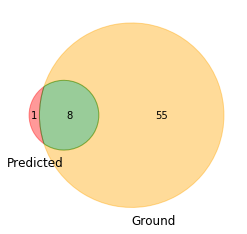

In [446]:
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
# venn2((set(orig), ground))
# orig
#res1[((res1.matches > th_m) & (res1.score > th_s))].groupby(["query", "reference"])["total"].max()
x  = res1[((res1.matches > th_m) & (res1.score > th_s))]
x = x.reset_index()

x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
orig = x.reference
venn2((set(orig), ground))
orig


In [438]:
set(orig).intersection(ground)

{'Asparagine_3TMS',
 'Citric acid_4TMS',
 'Fructose_5TMS isomer 2',
 'Lysine_4TMS',
 'Myo-inositol_6TMS',
 'Serine_3TMS',
 'Stearic acid_1TMS',
 'Threonine_3TMS spectra 1'}

In [439]:
set(orig).difference(ground)

{'Uridine_4TMS isomer 1'}

,query,reference,total
2,C01,Lysine_4TMS,21.207676
11,C03,Fructose_5TMS isomer 2,15.780100
22,C07,Citric acid_4TMS,9.617874
28,C11,Myo-inositol_6TMS,11.902377
31,C17,Glutamic acid_3TMS spectra 2,6.519331
32,C19,Aspartic acid_3TMS isomer,5.459957
36,C21,Uridine_4TMS isomer 1,7.230031
38,C23,Serine_3TMS,6.604582
39,C25,Palmitic acid_1TMS,4.618372
41,C26,Acetylgalactosamine_5TMS isomer 1,3.616759


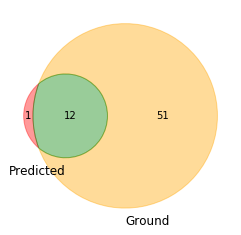

In [447]:
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference
x  = res2[((res2.matches > th_m) & (res2.score > th_s))]
x = x.reset_index()

x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
new = x.reference


venn2((set(new), ground))
x

In [427]:
set(new).intersection(ground)

{'Acetylglucosamine_5TMS isomer 1',
 'Asparagine_3TMS',
 'Aspartic acid_3TMS isomer',
 'Citric acid_4TMS',
 'Creatinine_3TMS',
 'Fructose_5TMS isomer 2',
 'Glucuro-3,6-lactone_3TMS isomer 2',
 'Glutamic acid_3TMS spectra 2',
 'Histidine_3TMS',
 'Leucine_2TMS',
 'Lysine_4TMS',
 'Myo-inositol_6TMS',
 'Palmitic acid_1TMS',
 'Phenylalanine_2TMS',
 'Proline_2TMS',
 'Serine_3TMS',
 'Spermine_6TMS',
 'Stearic acid_1TMS',
 'Threonine_3TMS spectra 1',
 'Tyrosine_3TMS',
 'trans-Aconitic acid_3TMS'}

In [428]:
orig = np.zeros(shape=(20, 10))
new = orig.copy()
for i, n_m in enumerate(range(1,21)):
    for j, n_s in enumerate(np.arange(0,1,0.1)):
        for res, grid in zip([res1, res2], [orig, new]):
            p = set(res[((res.matches > n_m) & (res.score > n_s))].reference)
            
            TP = len(p.intersection(ground))
            FP = len(p.difference(ground))
            FN = len(ground.difference(p))


            grid[i,j] = TP/(TP + 0.5*(FN+FP)) if (TP + 0.5*(FN+FP)) != 0 else 0
        

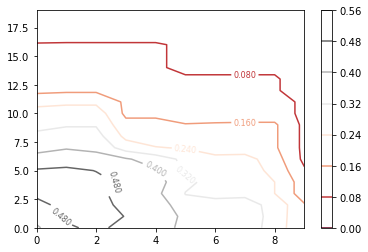

In [429]:
c = plt.contour(new, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()

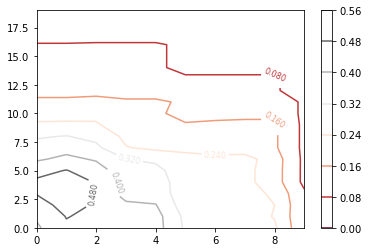

In [430]:
c = plt.contour(orig, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()


In [205]:
new.sum()

40.85455359750591

In [206]:
orig.sum()

37.630986297918795

In [210]:
th_m, th_s = 5, 0.4
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference


In [211]:
set(orig) -set(new)

set()

In [212]:
set(new) -set(orig)

{'Acetylgalactosamine_4TMS',
 'Acetylgalactosamine_5TMS isomer 1',
 'Aspartic acid_3TMS isomer',
 'Glutamic acid_3TMS spectra 1',
 'Glutamic acid_3TMS spectra 2',
 'Glycylvaline_4TMS',
 'Palmitic acid_1TMS'}

In [213]:
set(new) - ground

{'2-Deoxyglucose_4TMS',
 'Acetyllysine_4TMS',
 'Galactitol_6TMS',
 'Gluconic acid-1,4-lactone',
 'Glucuro-3,6-lactone_3TMS isomer 1',
 'Glutamic acid_3TMS spectra 1',
 'Glycylvaline_4TMS',
 'Isocitric acid_4TMS',
 'Spermine_derivative',
 'Uridine_4TMS isomer 1',
 'Uridine_4TMS isomer 2',
 'Xylose_4TMS'}

In [19]:
set(orig) - ground

{'Acetyllysine_3TMS',
 'Acetyllysine_4TMS',
 'Galactitol_6TMS',
 'Gluconic acid-1,4-lactone',
 'Glutamic acid_2TMS',
 'Glycylleucine_4TMS',
 'Tryptamine_3TMS',
 'Uridine_4TMS isomer 1',
 'Uridine_4TMS isomer 2',
 'Xylose_4TMS'}